<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/Week_2/ANN_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Iris 2 output**

Xây dựng model để dự đoán petallength và loại iris từ những thuộc tính còn lại

In [49]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input, Model
import tensorflow as tf

In [50]:
data = pd.read_excel("https://github.com/lualua0909/DeepLearning-LDS8/raw/main/Data/Iris.xls")

In [51]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
iris_class = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
data['species_num'] = [iris_class[i] for i in data.iris]
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [53]:
df_train = data.sample(frac=0.7, random_state=0)
df_valid = data.drop(df_train.index)

In [54]:
X_train = df_train.drop(['petallength', 'iris', 'species_num'], axis=1)
X_valid = df_valid.drop(['petallength', 'iris', 'species_num'], axis=1)

In [55]:
y_train = df_train['petallength']
y_valid = df_valid['petallength']

In [56]:
z_train = df_train['species_num']
z_valid = df_valid['species_num']

#**Build model**

In [57]:
inputs = Input(shape=(3,), name='input')
x = Dense(16, activation='relu', name='16')(inputs)
x = Dense(32, activation='relu', name='32')(x)

output1 = Dense(1, name='cont_out')(x)
output2 = Dense(3, activation='softmax', name='cat_out')(x)

In [58]:
model = Model(inputs=inputs, outputs=[output1, output2])

In [59]:
model.compile

<bound method Model.compile of <keras.engine.functional.Functional object at 0x7fbfbcb127d0>>

In [60]:
model.compile(loss={'cont_out': 'mean_absolute_error',
                    'cat_out': 'sparse_categorical_crossentropy'},
              optimizer='adam')

In [61]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 3)]          0                                            
__________________________________________________________________________________________________
16 (Dense)                      (None, 16)           64          input[0][0]                      
__________________________________________________________________________________________________
32 (Dense)                      (None, 32)           544         16[0][0]                         
__________________________________________________________________________________________________
cont_out (Dense)                (None, 1)            33          32[0][0]                         
____________________________________________________________________________________________

In [62]:
history = model.fit(X_train,
                    {'cont_out': y_train, 'cat_out': z_train},
                    validation_data=(X_valid, {'cont_out': y_valid, 'cat_out': z_valid}),
                    epochs=100,
                    batch_size=32)

Epoch 1/100
4/4 [==============================] - 3s 90ms/step - loss: 3.2588 - cont_out_loss: 2.1735 - cat_out_loss: 1.0853 - val_loss: 3.0098 - val_cont_out_loss: 1.9021 - val_cat_out_loss: 1.1077
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 3.0575 - cont_out_loss: 1.9976 - cat_out_loss: 1.0599 - val_loss: 2.8386 - val_cont_out_loss: 1.7548 - val_cat_out_loss: 1.0838
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 2.8535 - cont_out_loss: 1.8167 - cat_out_loss: 1.0368 - val_loss: 2.6616 - val_cont_out_loss: 1.5942 - val_cat_out_loss: 1.0674
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 2.6501 - cont_out_loss: 1.6321 - cat_out_loss: 1.0180 - val_loss: 2.4888 - val_cont_out_loss: 1.4342 - val_cat_out_loss: 1.0546
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 2.4368 - cont_out_loss: 1.4306 - cat_out_loss: 1.0062 - val_loss: 2.3095 - val_cont_out_loss: 1.2781 - val_cat_out_loss: 1.0314


In [66]:
history_df = pd.DataFrame(history.history)
history_df

,loss,cont_out_loss,cat_out_loss,val_loss,val_cont_out_loss,val_cat_out_loss
0,3.258845,2.173529,1.085315,3.009751,1.902050,1.107700
1,3.057494,1.997636,1.059858,2.838648,1.754839,1.083809
2,2.853456,1.816668,1.036788,2.661602,1.594185,1.067417
3,2.650091,1.632101,1.017990,2.488796,1.434168,1.054628
4,2.436793,1.430630,1.006163,2.309461,1.278061,1.031401
...,...,...,...,...,...,...
95,0.589419,0.215671,0.373747,0.587638,0.236104,0.351534
96,0.588395,0.217371,0.371024,0.584796,0.233683,0.351114
97,0.588652,0.219081,0.369572,0.584110,0.233497,0.350613
98,0.581447,0.214444,0.367003,0.588077,0.240266,0.347811


#**Plotting**

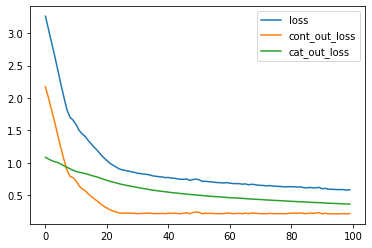

In [67]:
history_df.loc[:, ['loss', 'cont_out_loss', 'cat_out_loss']].plot()

In [68]:
print('Minium loss = {}'.format(history_df['loss'].min()))

Minium loss = 0.5814465284347534


#**Dự đoán kết quả**

In [69]:
y_hat_valid = model.predict(X_valid)

In [70]:
y_hat_valid[0][0:5] # Du doan petal length

array([[1.4409684],
       [1.3507844],
       [1.6135681],
       [1.4684902],
       [1.6192518]], dtype=float32)

In [71]:
y_hat_valid[1][0:5] # Du doan specie nums

array([[0.9527574 , 0.04366834, 0.00357433],
       [0.93809944, 0.0566434 , 0.00525715],
       [0.9703766 , 0.02798105, 0.00164233],
       [0.96011794, 0.03703194, 0.00285016],
       [0.94107777, 0.05399915, 0.00492309]], dtype=float32)

In [72]:
import numpy as np

In [73]:
z_hat_valid = np.argmax(y_hat_valid[1], axis=-1)

In [76]:
z_hat_valid

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2])